<a href="https://colab.research.google.com/github/jemaaku96/deeplearning/blob/main/Breast_Cancer_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# Loading the data set
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [3]:
# View data
pd.DataFrame(data.data, columns = data.feature_names).head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33, random_state = 42)

In [5]:
# Scaling the data to standard to avoid huge distance difference due to variables unit.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
# Getting the dimension of the data
N, D = X_train.shape

In [7]:
# Making tensorflow model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (D,)),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [8]:
# Alternative
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1, shape = (D,), activation='sigmoid'))

In [9]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [10]:
r = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.8211 - loss: 0.4723 - val_accuracy: 0.8138 - val_loss: 0.4623
Epoch 2/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.8246 - loss: 0.4874 - val_accuracy: 0.8298 - val_loss: 0.4316
Epoch 3/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.8740 - loss: 0.3903 - val_accuracy: 0.8511 - val_loss: 0.4051
Epoch 4/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.8638 - loss: 0.4015 - val_accuracy: 0.8564 - val_loss: 0.3814
Epoch 5/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8725 - loss: 0.3739 - val_accuracy: 0.8617 - val_loss: 0.3609
Epoch 6/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8983 - loss: 0.3288 - val_accuracy: 0.8830 - val_loss: 0.3427
Epoch 7/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9085 - loss: 0.3279 - val_accuracy: 0.8936 - val_loss: 0.3266
Epoch 8/100
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9139 - loss: 0.3175 - val_accuracy: 0.8

In [11]:
print("Train score:", model.evaluate(X_train, y_train))
print("Test score:", model.evaluate(X_test, y_test))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9881 - loss: 0.0791 
Train score: [0.08775630593299866, 0.9868766665458679]
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9766 - loss: 0.0814 
Test score: [0.08053028583526611, 0.9893617033958435]


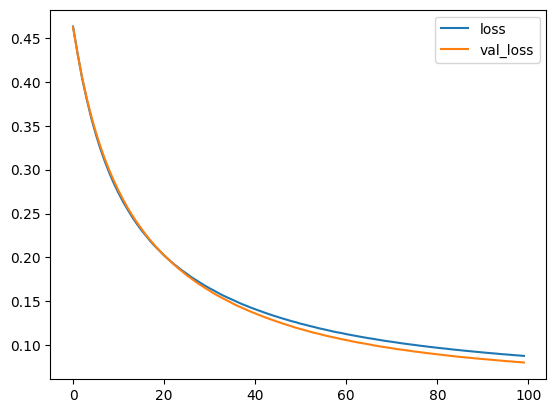

In [12]:
plt.plot(r.history["loss"], label = 'loss')
plt.plot(r.history["val_loss"], label = 'val_loss')
plt.legend();

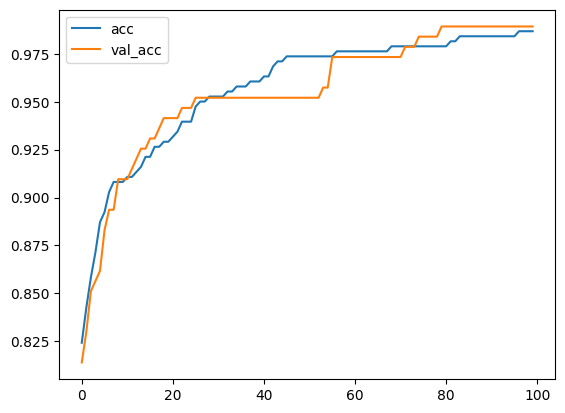

In [13]:
plt.plot(r.history["accuracy"], label = "acc")
plt.plot(r.history["val_accuracy"], label = "val_acc")
plt.legend()

In [15]:
# Making prediction
pred = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [16]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N, ) while predictions are size (N, 1)
pred = np.round(pred).flatten()
pred

array([1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1.,
       0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1.,
       1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1.], dtype=float32)

In [17]:
print("Manually calculated accuracy:", np.mean(pred == y_test))
print("Evaluate output: ", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9893617021276596
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9766 - loss: 0.0814 
Evaluate output:  [0.08053028583526611, 0.9893617033958435]


In [18]:
# Saving and Loading a model
model.save('linearclassifier.h5')
model = tf.keras.models.load_model('linearclassifier.h5')
model.evaluate(X_test, y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9766 - loss: 0.0814 


[0.08053028583526611, 0.9893617033958435]